In [98]:
from PIL import Image
from matplotlib import pyplot as plt
from pathlib import Path
from typing import Literal

# create an enum for the sprite generation
SpriteGen = Literal[
    "red_green",
    "red_blue",
    "yellow",
    "silver",
    "gold",
    "crystal",
    "ruby_sapphire",
    "emerald",
    "firered_leafgreen",
    "diamond_pearl",
    "platinum",
    "heartgold_soulsilver",
    "black_white",
    "sugimori",
]

SPRITE_GENS: dict[SpriteGen, str] = {
    "red_green": "red-green",
    "red_blue": "red-blue",
    "yellow": "yellow",
    "silver": "silver",
    "gold": "gold",
    "crystal": "crystal",
    "ruby_sapphire": "ruby-sapphire",
    "emerald": "emerald",
    "firered_leafgreen": "firered-leafgreen",
    "diamond_pearl": "diamond-pearl",
    "platinum": "platinum",
    "heartgold_soulsilver": "heartgold-soulsilver",
    "black_white": "black-white",
    "sugimori": "sugimori",
}

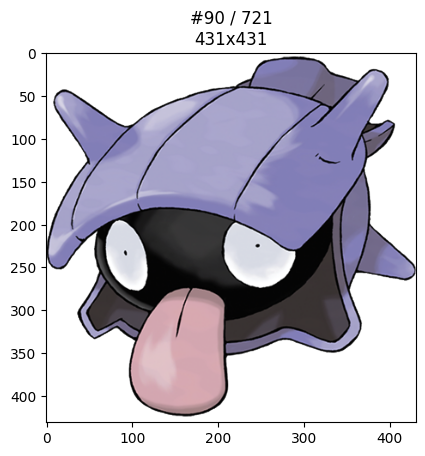

In [153]:
def get_max_id(dir: Path) -> int:
    """Get the max id of a directory of sprites"""
    max_id = 0
    for file in dir.iterdir():
        if file.is_file():
            try:
                max_id = max(max_id, int(file.stem))
            except ValueError:
                pass
    return max_id


def get_dir(generation: SpriteGen) -> Path:
    if generation == "sugimori":
        return Path(".") / "data" / "poke_data" / "sugimori"
    return Path(".") / "data" / "poke_data" / "main-sprites" / SPRITE_GENS[generation]


def plot_sprite(
    poke_id: int,
    generation: SpriteGen = "black_white",
) -> None:
    """Plot a sprite of a pokemon"""
    dir = get_dir(generation)
    num_files = get_max_id(dir)

    # try to load the directory. If it doesn't exist, show a question mark
    try:
        img = Image.open(dir / f"{poke_id}.png")
    except FileNotFoundError as e:
        dir = Path(".") / "data" / "main-sprites" / "black-white"
        # get number of elements in directory
        img = Image.open(dir / "0.png")
    finally:
        w, h = img.size
        title = f"#{poke_id} / {num_files}\n{w}x{h}"

    # plot the image
    plt.imshow(img)
    plt.title(title)
    plt.show()


plot_sprite(90, generation="sugimori")

In [154]:
# interest func to plot a sprite from every gen in a matplotlib subplot
def plot_sprite_from_every_gen(poke_id: int) -> None:
    fig, axes = plt.subplots(3, 5)
    # set figsize
    fig.set_figwidth(15)
    fig.set_figheight(10)
    for i, gen in enumerate(SPRITE_GENS):
        dir = get_dir(gen)
        try:
            img = Image.open(dir / f"{poke_id}.png")
        except FileNotFoundError as e:
            dir = Path(".") / "data" / "main-sprites" / "black-white"
            # get number of elements in directory
            img = Image.open(dir / "0.png")
        finally:
            w, h = img.size
            title = f"#{poke_id} ({gen})\n{w}x{h}"

        axes[i // 5, i % 5].imshow(img)
        axes[i // 5, i % 5].set_title(title)
    plt.show()

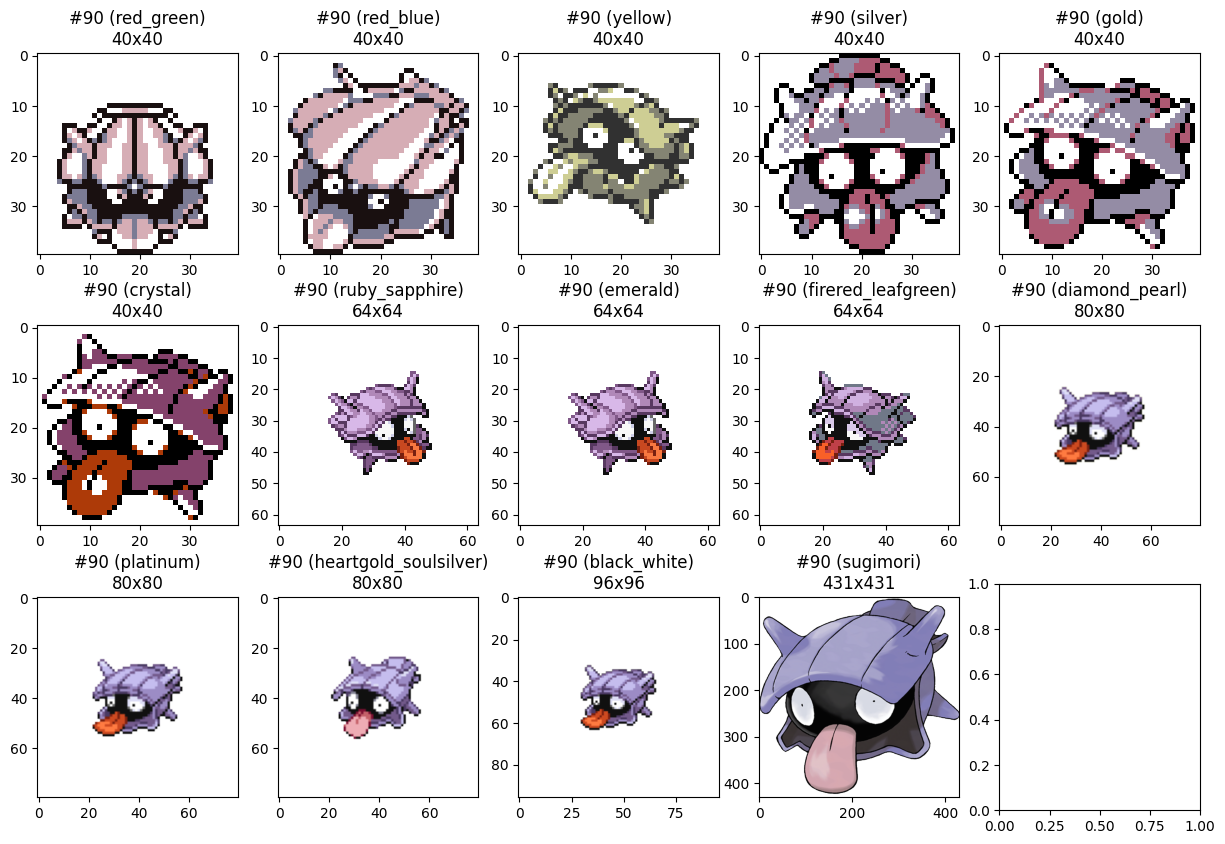

In [155]:
plot_sprite_from_every_gen(90)

In [159]:
from datasets import Dataset, Image as HFImage


def get_dataset(generation: SpriteGen) -> Dataset:
    sprite_dir = get_dir(generation)
    sugimori_dir = get_dir("sugimori")
    dataset = {
        "sprite": [],
        "watercolour": [],
        "poke_id": [],
    }
    for file in sprite_dir.iterdir():
        if not file.is_file():
            continue

        if file.stem == 0:
            continue

        try:
            img_id = int(file.stem)
        except ValueError:
            continue

        dataset["sprite"].append(str(file.resolve()))
        dataset["watercolour"].append(str((sugimori_dir / f"{img_id}.png").resolve()))
        dataset["poke_id"].append(img_id)

    return (
        Dataset.from_dict(dataset)
        .cast_column("sprite", HFImage())
        .cast_column("watercolour", HFImage())
    )

In [160]:
ds = get_dataset("black_white")
ds.save_to_disk("data/dataset/black_white")

Saving the dataset (1/1 shards): 100%|██████████| 650/650 [00:00<00:00, 726.80 examples/s]
